### Problem 3
Name: David James

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = [[4,-1,0,-1,0,0],
     [-1,4,-1,0,-1,0],
     [0,-1,4,0,0,-1],
     [-1,0,0,4,-1,0],
     [0,-1,0,-1,4,-1],
     [0,0,-1,0,-1,4]]

A = np.array(A)
b = np.array([2,1,2,2,1,2])
x0 = np.array([0,0,0,0,0,0])
tol = 0.01

In [3]:
def jacobi(A,b,x0,tol):
    U = np.triu(A,1)
    L = np.tril(A,-1)
    D = np.diag(np.diag(A))
    
    k = 0
    x = np.linalg.solve(-D,np.matmul(L+U,x0))
    x += np.linalg.solve(D,b)
        
    r = []
    r.append(np.linalg.norm(b-np.matmul(A,x)))
    cond = True
    
    while(r[k] >= tol):
        x = np.linalg.solve(-D,np.matmul(L+U,x))
        x += np.linalg.solve(D,b)
        r.append(np.linalg.norm(b-np.matmul(A,x)))
        k += 1
        
    return x,r,k

In [4]:
def gauss_seidel(A,b,x,tol):
    L = np.tril(A)
    U = A - L
    
    x = np.dot(np.linalg.inv(L), b - np.dot(U, x))
    
    k = 0
    r = []
    r.append(np.linalg.norm(b-np.matmul(A,x)))
    while(r[k] >= tol):
        x = np.dot(np.linalg.inv(L), b - np.dot(U, x))
        r.append(np.linalg.norm(b-np.matmul(A,x)))
        k += 1
    return x,r,k

In [5]:
xj,rj,kj = jacobi(A,b,x0,tol)
xg,rg,kg = gauss_seidel(A,b,x0,tol)

[0.99800557 0.99717945 0.99800557 0.99800557 0.99717945 0.99800557]


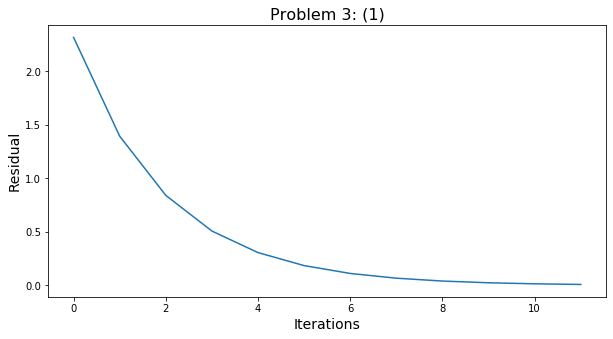

In [6]:
plt.figure(figsize=(10,5))

plt.plot(range(kj+1),rj)
plt.ylabel('Residual',fontsize=14)
plt.xlabel('Iterations',fontsize=14)
plt.title('Problem 3: (1)',fontsize=16)

print(xj)

[0.99781379 0.99813389 0.99920358 0.99868048 0.9988737  0.99951932]


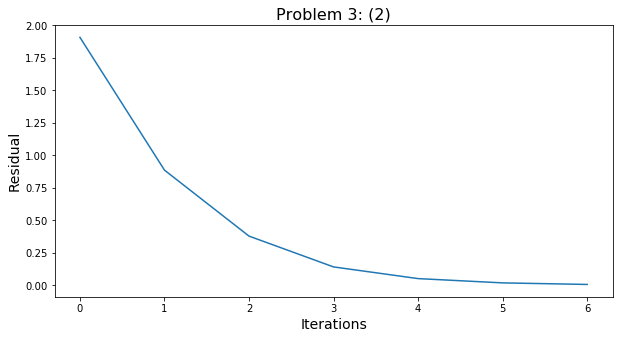

In [7]:
plt.figure(figsize=(10,5))

plt.plot(range(kg+1),rg)
plt.ylabel('Residual',fontsize=14)
plt.xlabel('Iterations',fontsize=14)
plt.title('Problem 3: (2)',fontsize=16)

print(xg)